# 🏪📊 Store Sharing Data Analysis and Visualization

## 📌 About This Project
This notebook focuses on **analyzing store-sharing data** to uncover patterns and insights related to store performance, customer behavior, and operational efficiency. Understanding how stores share resources and customers can help improve decision-making and optimize business strategies.

## 🔍 Dataset Overview
The dataset includes key factors such as **store locations, revenue, customer visits, product sales**, and more. The objective is to **explore trends, detect correlations, and visualize the relationships between different variables** to gain actionable insights.

## 📊 Techniques Used
- **Data Cleaning & Preprocessing** 🛠️  
- **Exploratory Data Analysis (EDA)** 🔍  
- **Data Visualization (Bar Charts, Line Graphs, Heatmaps, etc.)** 📈  
- **Predictive Analytics and Trend Analysis (Optional)** 📉  

By the end of this analysis, we aim to develop a **deeper understanding of store-sharing dynamics** and extract **data-driven business insights**. 🚀

📝 **Let's dive in!**


*•Features*
    
- *timestamp = timestamp field for grouping the data*
- *cnt = the count of a new bike shares*
- *t1 = real temperature in C*
- *t2 = temperature in C “feels like”*
- *hum = humidity in percentage*
- *wind_speed = wind speed in km/h*
- *weather_code = category of the weather*
- *is_holiday = boolean field - 1 holiday / 0 non holiday*
- *is_weekend = boolean field - 1 if the day is weekend*
- *season = category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.*
    
*•"weather_code" category description:*

- *1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity*
- *2 = scattered clouds / few clouds*
- *3 = Broken clouds*
- *4 = Cloudy*
- *7 = Rain/ light Rain shower/ Light rain*
- *10 = rain with thunderstorm*
- *26 = snowfall*
- *94 = Freezing Fog*


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

import warnings
warnings.filterwarnings('ignore')

In [8]:
df=pd.read_csv("store_sharing.csv")
df

timestamp   cnt   t1   t2    hum  wind_speed  weather_code  \
0      2015-01-04 00:00:00   182  3.0  2.0   93.0         6.0           3.0   
1      2015-01-04 01:00:00   138  3.0  2.5   93.0         5.0           1.0   
2      2015-01-04 02:00:00   134  2.5  2.5   96.5         0.0           1.0   
3      2015-01-04 03:00:00    72  2.0  2.0  100.0         0.0           1.0   
4      2015-01-04 04:00:00    47  2.0  0.0   93.0         6.5           1.0   
...                    ...   ...  ...  ...    ...         ...           ...   
17409  2017-01-03 19:00:00  1042  5.0  1.0   81.0        19.0           3.0   
17410  2017-01-03 20:00:00   541  5.0  1.0   81.0        21.0           4.0   
17411  2017-01-03 21:00:00   337  5.5  1.5   78.5        24.0           4.0   
17412  2017-01-03 22:00:00   224  5.5  1.5   76.0        23.0           4.0   
17413  2017-01-03 23:00:00   139  5.0  1.0   76.0        22.0           2.0   

       is_holiday  is_weekend  season  
0             0.0         1.0     3.0  
1             0.0         1.0     3.0  
2             0.0         1.0     3.0  
3             0.0         1.0     3.0  
4             0.0         1.0     3.0  
...           ...         ...     ...  
17409         0.0         0.0     3.0  
17410         0.0         0.0     3.0  
17411         0.0         0.0     3.0  
17412         0.0         0.0     3.0  
17413         0.0         0.0     3.0  

[17414 rows x 10 columns]

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [13]:
df.describe()

cnt            t1            t2           hum    wind_speed  \
count  17414.000000  17414.000000  17414.000000  17414.000000  17414.000000   
mean    1143.101642     12.468091     11.520836     72.324954     15.913063   
std     1085.108068      5.571818      6.615145     14.313186      7.894570   
min        0.000000     -1.500000     -6.000000     20.500000      0.000000   
25%      257.000000      8.000000      6.000000     63.000000     10.000000   
50%      844.000000     12.500000     12.500000     74.500000     15.000000   
75%     1671.750000     16.000000     16.000000     83.000000     20.500000   
max     7860.000000     34.000000     34.000000    100.000000     56.500000   

       weather_code    is_holiday    is_weekend        season  
count  17414.000000  17414.000000  17414.000000  17414.000000  
mean       2.722752      0.022051      0.285403      1.492075  
std        2.341163      0.146854      0.451619      1.118911  
min        1.000000      0.000000      0.000000      0.000000  
25%        1.000000      0.000000      0.000000      0.000000  
50%        2.000000      0.000000      0.000000      1.000000  
75%        3.000000      0.000000      1.000000      2.000000  
max       26.000000      1.000000      1.000000      3.000000

In [15]:
df.rename(columns={"cnt":"count_of_bike","t1":"real_temp","t2":"feels_like","hum":"humadity","weather_code":"weather"},inplace=True)

In [17]:
#Let's convert the columns to appropriate data types
df['weather'] = df['weather'].astype(int).astype(str)
df['is_holiday'] = df['is_holiday'].astype(int)
df['is_weekend'] = df['is_weekend'].astype(int)
df['season'] = df['season'].astype(int).astype(str)

In [19]:
df.dtypes

timestamp         object
count_of_bike      int64
real_temp        float64
feels_like       float64
humadity         float64
wind_speed       float64
weather           object
is_holiday         int32
is_weekend         int32
season            object
dtype: object

In [21]:
#Check for missing values in the dataset
df.isnull().sum()

timestamp        0
count_of_bike    0
real_temp        0
feels_like       0
humadity         0
wind_speed       0
weather          0
is_holiday       0
is_weekend       0
season           0
dtype: int64

In [23]:
df.duplicated().sum()

0

In [25]:
# Map numeric season codes to their corresponding season names using a custom function and applied it to the "season" column.
def season(x):
    if x=="0":
        return "spring"
    elif x=="1":
        return "summer"
    elif x=="2":
        return "fall"
    elif x=="3":
        return "winter"

df["season"]=df["season"].apply(season)

In [27]:
#Assign descriptive weather labels to numeric weather codes using a custom function and applied it to the "weather" column.
def weather(x):
    if x=="1":
        return "clear"
    elif x=="2":
        return "few clouds"
    elif x=="3":
        return "broken clouds"
    elif x=="4":
        return "cloudy"
    elif x=="7":
        return "rainy"
    elif x=="10":
        return "thunderstrom"
    elif x=="26":
        return "snowfall"
    elif x=="94":
        return "freezing fog"

df["weather"]=df["weather"].apply(weather)

In [29]:
df.sample(3)

timestamp  count_of_bike  real_temp  feels_like  humadity  \
11885  2016-05-16 02:00:00             61       11.0        11.0      77.0   
5203   2015-08-09 10:00:00           1737       22.5        21.5      42.5   
1330   2015-02-28 12:00:00           1168        9.0         6.0      87.0   

       wind_speed        weather  is_holiday  is_weekend  season  
11885         6.5         cloudy           0           0  spring  
5203         11.0          clear           0           1  summer  
1330         22.0  broken clouds           0           1  winter

In [31]:
df.dtypes

timestamp         object
count_of_bike      int64
real_temp        float64
feels_like       float64
humadity         float64
wind_speed       float64
weather           object
is_holiday         int32
is_weekend         int32
season            object
dtype: object

In [33]:
#Transform timestamp in type
df.timestamp=pd.to_datetime(df.timestamp)

In [35]:
#Set it as index
df.set_index("timestamp",inplace=True)

In [37]:
#Break down the timestamp into separate time-related components for further analysis.
df['day'] = df.index.day
df['month'] = df.index.month
df['year'] = df.index.year
df['hour'] = df.index.hour
df['week'] = df.index.isocalendar().week
df['weekday'] = df.index.weekday

In [39]:
#Let's convert the columns to appropriate data types
df['day']=df['day'].astype(object)
df['month']=df['month'].astype(object)
df['year']=df['year'].astype(object)
df['hour']=df['hour'].astype(object)
df['week']=df['week'].astype(object)
df['weekday']=df['weekday'].astype(object)

In [41]:
corr_matrix=df.select_dtypes(["int","float"]).corr()
corr_matrix

count_of_bike  real_temp  feels_like  humadity  wind_speed  \
count_of_bike       1.000000   0.388798    0.369035 -0.462901    0.116295   
real_temp           0.388798   1.000000    0.988344 -0.447781    0.145471   
feels_like          0.369035   0.988344    1.000000 -0.403495    0.088409   
humadity           -0.462901  -0.447781   -0.403495  1.000000   -0.287789   
wind_speed          0.116295   0.145471    0.088409 -0.287789    1.000000   
is_holiday         -0.051698  -0.042233   -0.040051  0.032068   -0.002606   
is_weekend         -0.096499  -0.005342   -0.008510  0.028098    0.011479   

               is_holiday  is_weekend  
count_of_bike   -0.051698   -0.096499  
real_temp       -0.042233   -0.005342  
feels_like      -0.040051   -0.008510  
humadity         0.032068    0.028098  
wind_speed      -0.002606    0.011479  
is_holiday       1.000000   -0.094898  
is_weekend      -0.094898    1.000000

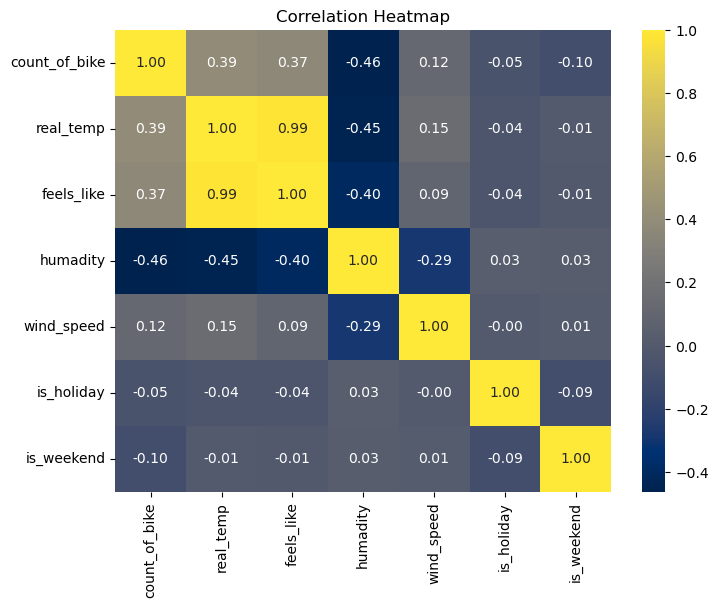

In [43]:
# Visualize the correlation with a heatmap.
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True,cmap="cividis" ,fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

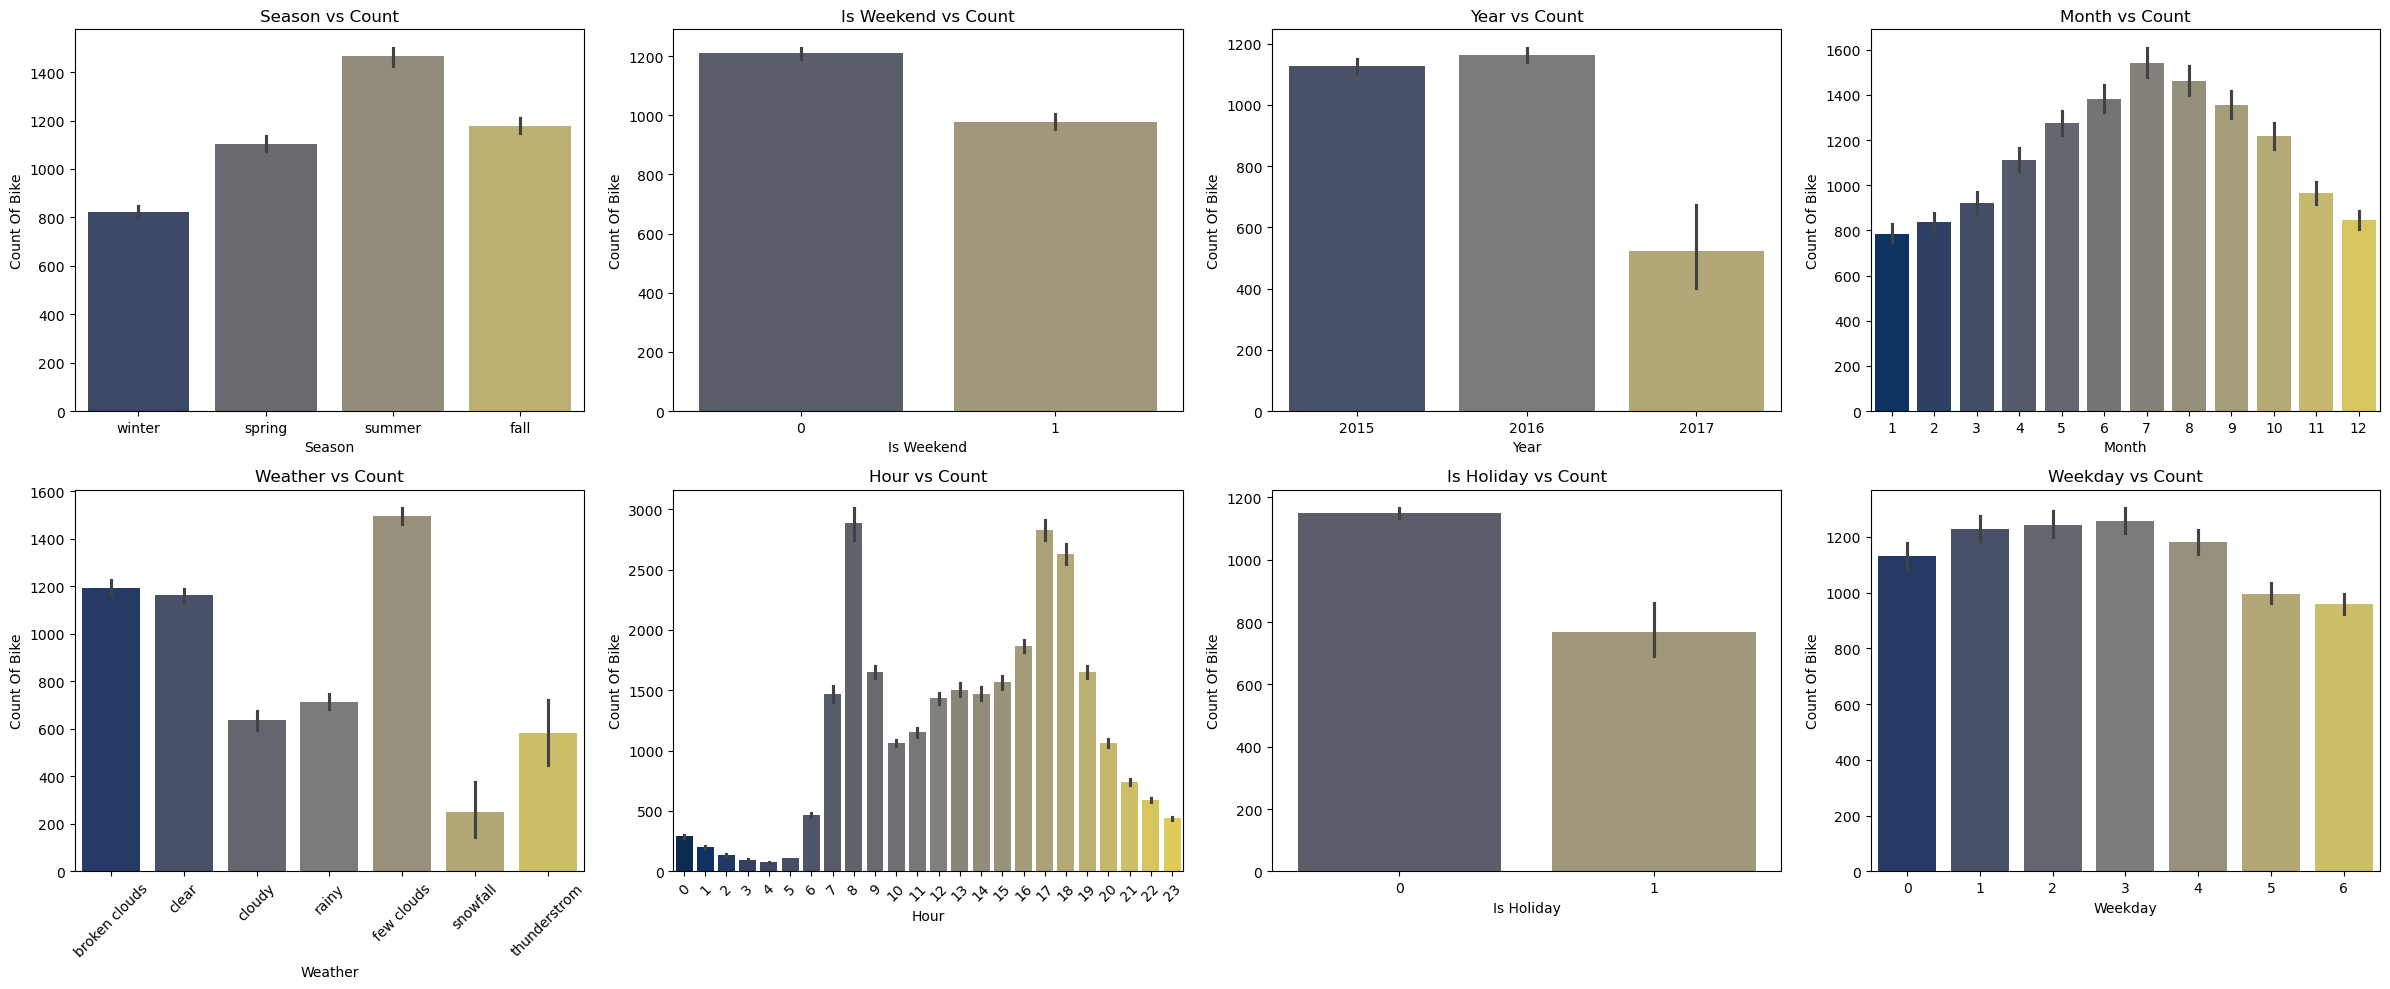

In [49]:
#Visualize the correlation of the target variable and the other features with barplot.
fig, axes = plt.subplots(2, 4, figsize=(24, 10))

sns.barplot(data=df, x='season', y='count_of_bike',palette= "cividis", ax=axes[0, 0])
axes[0, 0].set_title('Season vs Count')
axes[0, 0].set_xlabel("Season")
axes[0, 0].set_ylabel("Count Of Bike")

sns.barplot(data=df, x='is_weekend', y='count_of_bike', palette="cividis", ax=axes[0, 1])
axes[0, 1].set_title('Is Weekend vs Count')
axes[0, 1].set_xlabel("Is Weekend")
axes[0, 1].set_ylabel("Count Of Bike")

sns.barplot(data=df, x='year', y='count_of_bike', palette="cividis", ax=axes[0, 2])
axes[0, 2].set_title('Year vs Count')
axes[0, 2].set_xlabel("Year")
axes[0, 2].set_ylabel("Count Of Bike")

sns.barplot(data=df, x='month', y='count_of_bike', palette="cividis", ax=axes[0, 3])
axes[0, 3].set_title('Month vs Count')
axes[0, 3].set_xlabel("Month")
axes[0, 3].set_ylabel("Count Of Bike")

sns.barplot(data=df, x='weather', y='count_of_bike', palette="cividis", ax=axes[1, 0])
axes[1, 0].set_title('Weather vs Count')
axes[1, 0].set_xlabel("Weather")
axes[1, 0].set_ylabel("Count Of Bike")
axes[1, 0].tick_params(axis='x', rotation=45)  

sns.barplot(data=df, x='hour', y='count_of_bike', palette="cividis", ax=axes[1, 1])
axes[1, 1].set_title('Hour vs Count')
axes[1, 1].set_xlabel("Hour")
axes[1, 1].set_ylabel("Count Of Bike")
axes[1, 1].tick_params(axis='x', rotation=45)

sns.barplot(data=df, x='is_holiday', y='count_of_bike', palette="cividis", ax=axes[1, 2])
axes[1, 2].set_title('Is Holiday vs Count')
axes[1, 2].set_xlabel("Is Holiday")
axes[1, 2].set_ylabel("Count Of Bike")

sns.barplot(data=df, x='weekday', y='count_of_bike', palette="cividis", ax=axes[1, 3])
axes[1, 3].set_title('Weekday vs Count')
axes[1, 3].set_xlabel("Weekday")
axes[1, 3].set_ylabel("Count Of Bike")

plt.tight_layout()
plt.show()


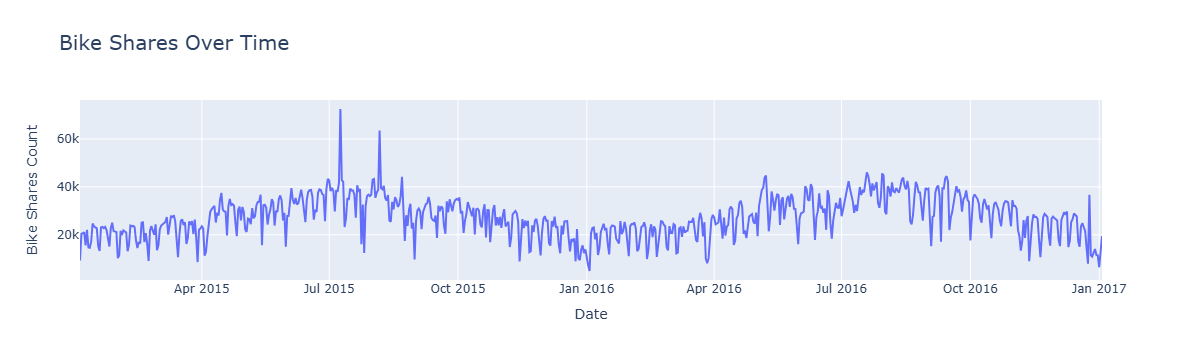

In [51]:
#Plot bike shares over time
df = df.reset_index()
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['date'] = df['timestamp'].dt.date
daily_data = df.groupby('date')['count_of_bike'].sum().reset_index()

fig = px.line(daily_data, x='date', y='count_of_bike', 
              title='Bike Shares Over Time',
              labels={'date': 'Date', 'count_of_bike': 'Bike Shares Count'})
fig.update_layout(title_font_size=20, xaxis_title_font_size=14, yaxis_title_font_size=14)
fig.show()


*•Based on the graph, it can be observed that bike shares exhibit seasonal trends, with higher counts during mid-year months (summer) and lower counts towards the end of the year (winter). Additionally, there are notable spikes indicating occasional high demand periods.*

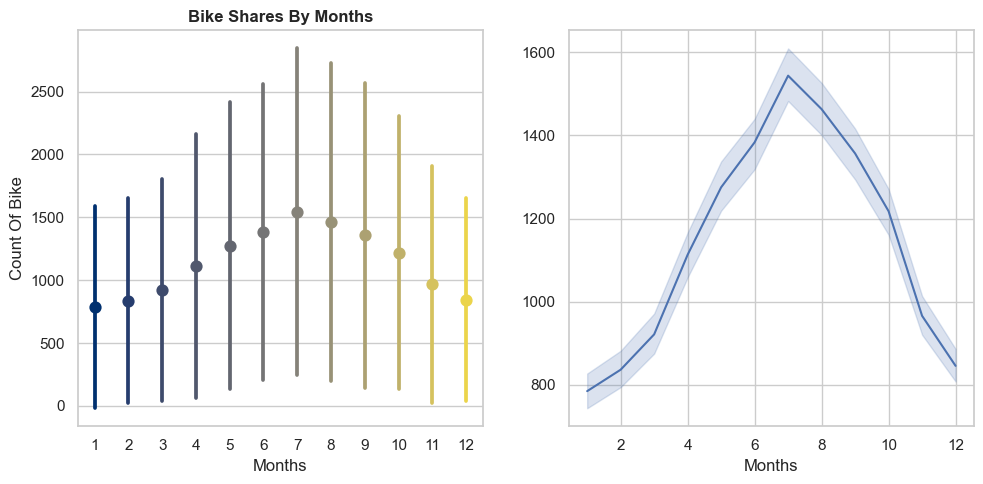

In [54]:
# Plot bike shares by months
sns.set_theme(style="whitegrid")
fig, axes=plt.subplots(1,2,figsize=(10,5))

sns.pointplot(x=df.month,y=df.count_of_bike, palette="cividis", ci="sd",ax=axes[0])
axes[0].set_title("Bike Shares By Months",fontweight="bold")
axes[0].set_xlabel("Months")
axes[0].set_ylabel("Count Of Bike")

sns.lineplot(x=df.month,y=df.count_of_bike, palette="cividis",ax=axes[1])
axes[1].set_title(" ")
axes[1].set_xlabel("Months")
axes[1].set_ylabel(" ")

plt.tight_layout()
plt.show()

*•The graphs indicate that bike usage varies across the months, with a clear peak during the middle of the year (likely summer) and lower counts in the colder months (winter).*

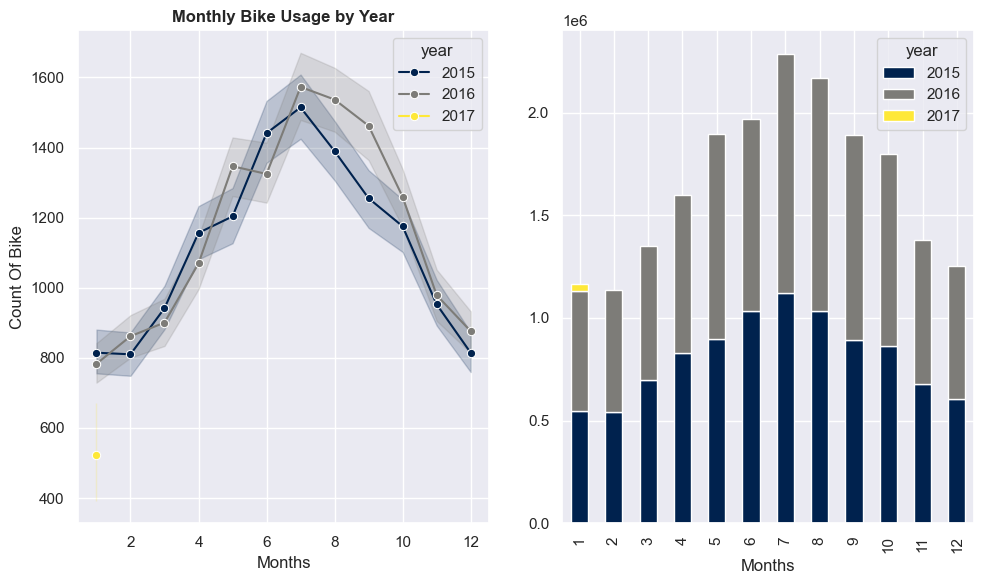

In [57]:
# Plot bike shares by year of month
sns.set_theme(style="darkgrid")
fig, axes=plt.subplots(1,2,figsize=(12,6))

sns.lineplot(x="month", y="count_of_bike", hue="year", data=df, palette="cividis", marker='o',ax=axes[0])
axes[0].set_title("Monthly Bike Usage by Year",fontweight="bold")
axes[0].set_xlabel("Months")
axes[0].set_ylabel("Count Of Bike")

pivot_data = df.groupby(['month', 'year'])['count_of_bike'].sum().unstack()
pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='cividis',ax=axes[1])
axes[1].set_title(" ")
axes[1].set_xlabel("Months")
axes[1].set_ylabel(" ")

plt.tight_layout()
plt.show()

*•The data shows a clear seasonal trend in bike usage, with peaks during summer months and declines in winter.*

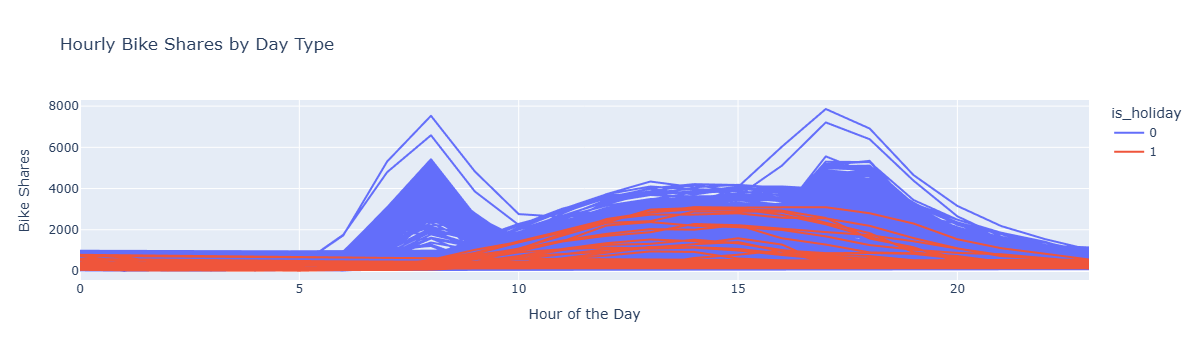

In [60]:
#Plot bike shares by hours on holidays
fig = px.line(df, x='hour', y='count_of_bike', color='is_holiday', 
              title='Hourly Bike Shares by Day Type')
fig.update_layout(xaxis_title='Hour of the Day', yaxis_title='Bike Shares')
fig.show()


*•On non-holidays, bike usage peaks during commuting hours (8 AM and 5 PM), reflecting workday routines. On holidays, usage remains lower overall and lacks distinct peaks, indicating more dispersed or recreational usage patterns throughout the day.*

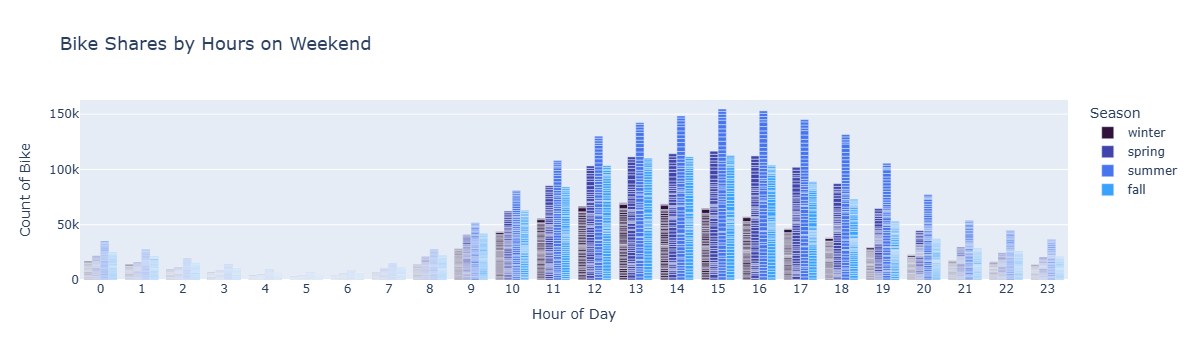

In [63]:
#Plot bike shares by hours on weekend and season
weekend_data = df[df["is_weekend"] == 1]

fig = px.bar(
    weekend_data,
    x="hour", 
    y="count_of_bike", 
    color="season",
    title="Bike Shares by Hours on Weekend",
    labels={"hour": "Hour of Day", "count_of_bike": "Count of Bike", "season": "Season"},
    barmode="group",
    color_discrete_sequence=px.colors.sequential.Turbo
)

fig.update_layout(
    xaxis=dict(tickmode="linear"),
    title_font_size=18
)
fig.show()


*•Bike usage is highest during midday to early evening hours (10 AM to 6 PM), with summer and fall having the highest counts. Winter and spring see comparatively lower usage, reflecting seasonal preferences for biking and favorable weather conditions during warmer months.*

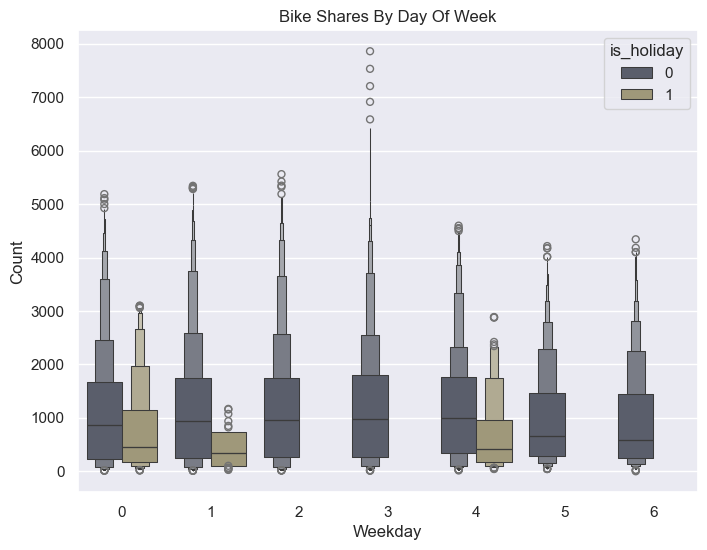

In [66]:
# Plot bike shares by day of week
plt.figure(figsize=(8,6))
sns.boxenplot(x=df.weekday,y=df.count_of_bike,hue=df.is_holiday,palette="cividis")
plt.title("Bike Shares By Day Of Week")
plt.xlabel("Weekday")
plt.ylabel("Count")
plt.show()

*•From the analysis,non-holiday days generally have a wider range and higher median bike usage, particularly on weekdays, reflecting commuting patterns.*

*•On holidays, bike usage is l1ower and more consistent across days, suggesting recreational use rather than work-related commuting.*

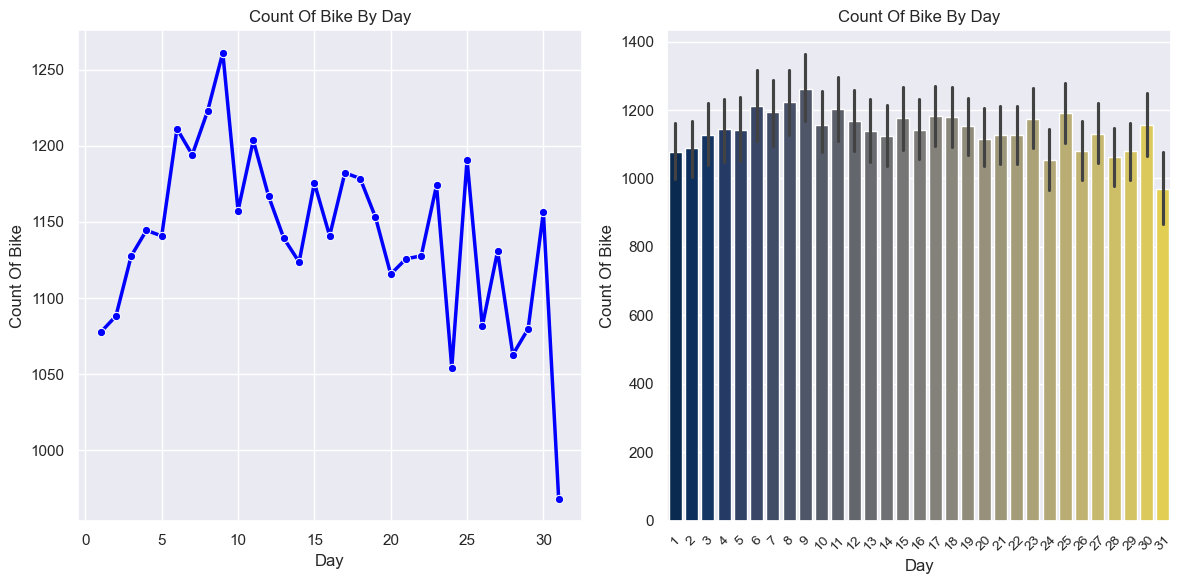

In [69]:
#Plot bike shares by day of month
sns.set_style("darkgrid")
sns.set_palette("cividis")

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.lineplot(x=df.day, y=df.count_of_bike, linewidth=2.5, marker='o', ci=None, color="blue");
plt.title("Count Of Bike By Day")
plt.xlabel("Day")
plt.ylabel("Count Of Bike")

plt.subplot(1,2,2)
sns.barplot(x=df.day,y=df.count_of_bike,palette="cividis")
plt.title("Count Of Bike By Day")
plt.xlabel("Day")
plt.ylabel("Count Of Bike")
plt.xticks(rotation=45,fontsize=10)

plt.tight_layout()
plt.show()

*•The analysis reveals that,bike counts throughout the month, with peaks around the middle and a sharp drop at the end.*

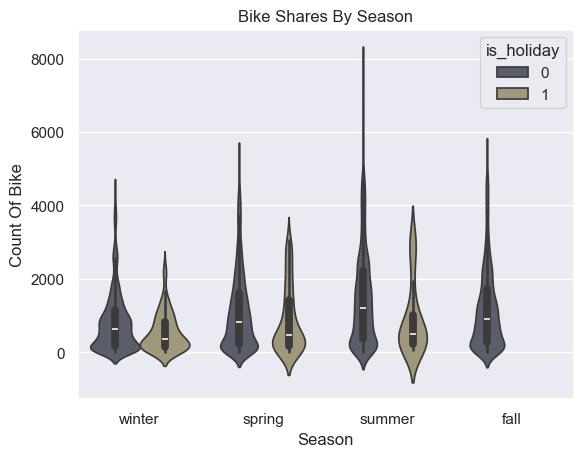

In [72]:
#Plot bike shares by season and holiday.
sns.set_theme(style="darkgrid")
sns.violinplot(x=df.season,y=df.count_of_bike,hue=df.is_holiday,palette="cividis")
plt.title("Bike Shares By Season")
plt.xlabel("Season")
plt.ylabel("Count Of Bike")

plt.show()

*•This analysis explores the bike usage is highest in summer and fall, with non-holidays consistently having a broader distribution and higher peaks compared to holidays.*

*•Winter and spring have lower overall bike counts, reflecting reduced activity during colder months.* 

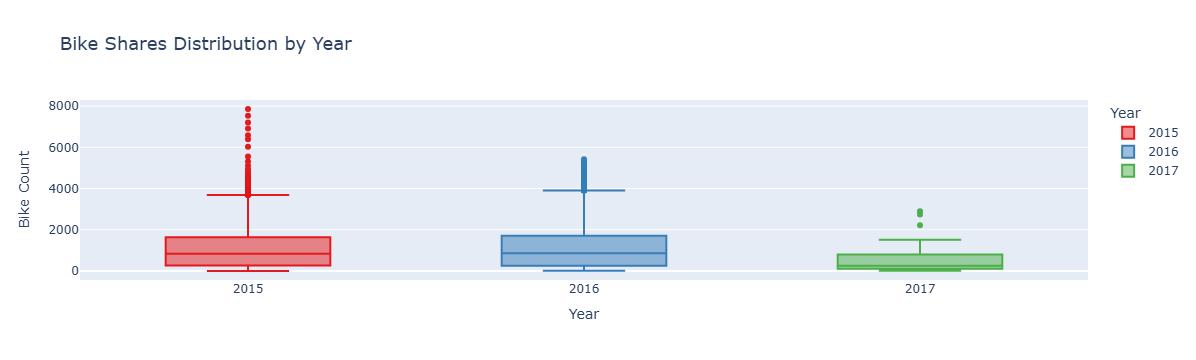

In [75]:
#Plot bike shares by year
fig = px.box(
    df,
    x="year",
    y="count_of_bike",
    title="Bike Shares Distribution by Year",
    labels={"count_of_bike": "Bike Count", "year": "Year"},
    color="year",
    color_discrete_sequence=px.colors.qualitative.Set1, 
)

fig.update_layout(title_font_size=18)
fig.show()


*•The median bike usage increased significantly in 2016, reflecting a peak in activity, while 2017 shows a noticeable decline.* 

*•The presence of outliers, especially in 2015 and 2016, indicates occasional days of unusually high bike usage.* 

*•This trend highlights a rise in popularity during 2016, followed by a decrease in 2017.*

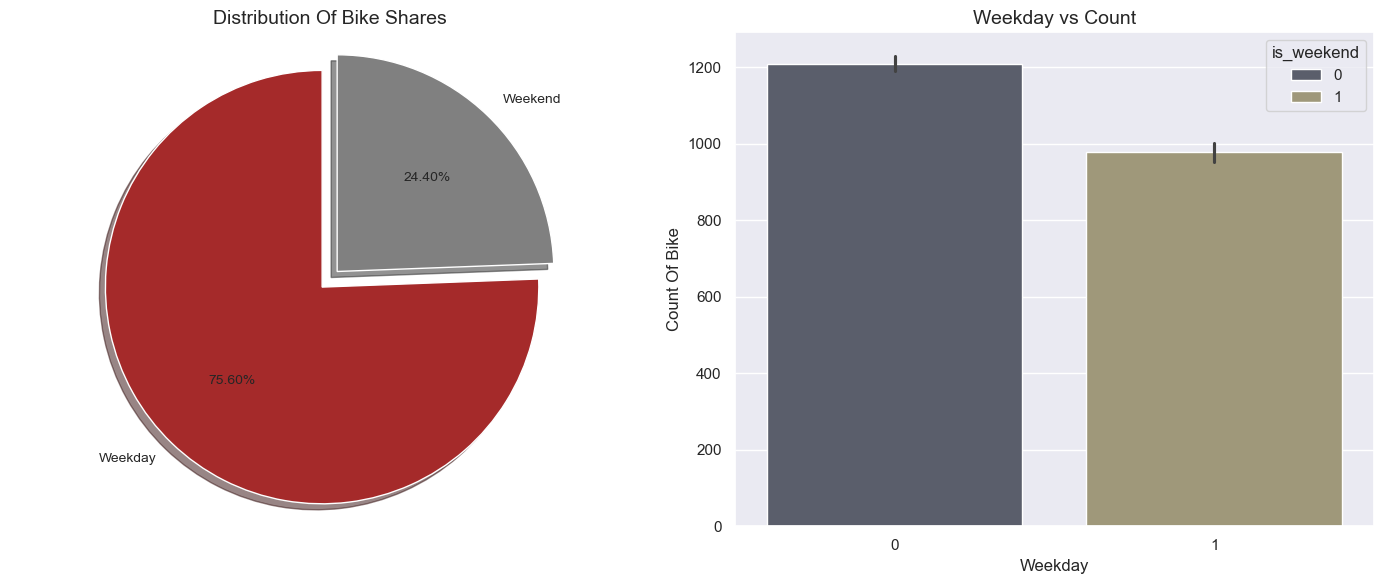

In [78]:
#Visualize the distribution of bike shares by weekend/weekday
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

weekend_data = df.groupby('is_weekend')['count_of_bike'].sum()
labels = ['Weekday', 'Weekend']
colors = ['brown','gray'] 
explode = [0.1] + [0] * (len(weekend_data) - 1)

axes[0].pie(weekend_data, labels=labels, autopct='%1.2f%%', startangle=90,
            explode=explode, shadow=True, textprops={'fontsize': 10}, colors=colors)
axes[0].set_title('Distribution Of Bike Shares', fontsize=14)
axes[0].axis('equal')

sns.barplot(data=df, x='is_weekend', y='count_of_bike', hue="is_weekend", palette="cividis", ax=axes[1])
axes[1].set_title('Weekday vs Count', fontsize=14)
axes[1].set_xlabel("Weekday", fontsize=12)
axes[1].set_ylabel("Count Of Bike", fontsize=12)

plt.tight_layout()
plt.show()


*•The plots suggest that the increased demand on weekdays is primarily influenced by commuting patterns and emphasize the role of work-related travel in bike-sharing usage.*

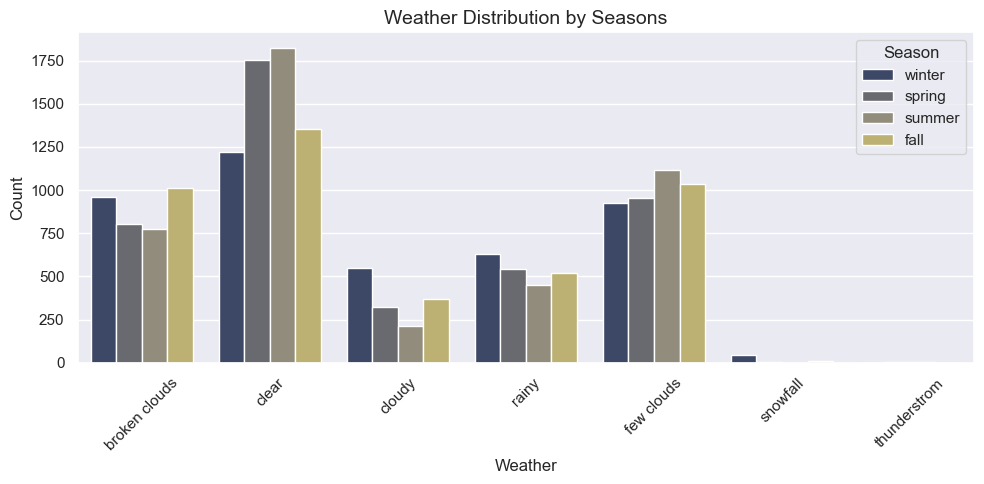

In [81]:
#Plot the distribution of weather by seasons
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="weather", hue="season", palette="cividis")

plt.title("Weather Distribution by Seasons", fontsize=14)
plt.xlabel("Weather", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Season")
plt.tight_layout()
plt.show()

*•Clear and few clouds dominate summer and fall, while broken clouds and cloudy conditions are more frequent in winter and spring.* 
*•Rainy weather is consistent across all seasons, while snowfall is exclusive to winter, and thunderstorms are relatively rare overall.* 

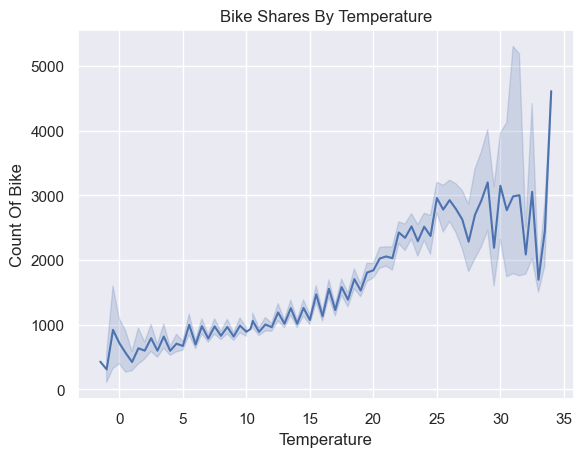

In [84]:
#Plot the bike shares by real temperature
sns.lineplot(x=df.real_temp,y=df.count_of_bike)
plt.title("Bike Shares By Temperature")
plt.xlabel("Temperature")
plt.ylabel("Count Of Bike")

plt.show()

*•The line plot illustrates the relationship between temperature and bike share counts.*

*•Bike usage steadily increases as temperatures rise, peaking around 30°C. This indicates that warmer weather encourages more bike-sharing activity.*

*•However, the variability at higher temperatures suggests other factors, such as extreme heat, may also influence usage.*





---------------------------------------------------------------------------------------------------------------------------------------------------

*•In conclusion:*

*✔Bike-sharing patterns are influenced by various factors, including weekdays, seasons, weather conditions, and temperature.* 

*✔Weekday demand is primarily driven by commuting, while weekends see more recreational usage.* 

*✔Warmer temperatures and clear weather significantly boost bike activity, with summer and fall being the most active seasons.* 

*➦These insights can help optimize bike-sharing services to better meet user demand and preferences.*

*✨Thank you for taking the time to review this analysis, and I hope it provides valuable insights!✨*